In [73]:
import folium
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import json
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import platform
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')

import pandas_datareader.data as web
from fbprophet import Prophet
from datetime import datetime
from pandas_datareader import data

# 1. YTN주식을 분석하세요

In [74]:
start = datetime(2010,1,1)
end = '2018-01-31'

ytn = data.get_data_yahoo("040300.KQ", start, end)
ytn.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-25,2105.0,2070.0,2070.0,2085.0,28481.0,2085.0
2018-01-26,2120.0,2080.0,2085.0,2115.0,47056.0,2115.0
2018-01-29,2155.0,2115.0,2115.0,2145.0,83893.0,2145.0
2018-01-30,2155.0,2120.0,2145.0,2155.0,49218.0,2155.0
2018-01-31,2170.0,2130.0,2155.0,2170.0,48226.0,2170.0


## 2018-01-31까지의 종가(Close) 기준으로 그래프 그리기 

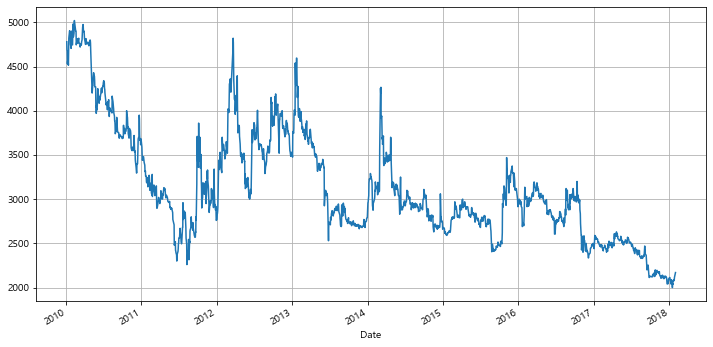

In [76]:
ytn['Close'].plot(figsize = (12,6), grid = True)

## 2016년01-31일부터, 2년 후, 2018-01-31 까지의 정보를 예측하시오
##  730일 간의 데이터를 예측해 보세요

In [75]:
ytn_trunc = ytn[:'2016-01-31']

In [77]:
df = pd.DataFrame({'ds':ytn_trunc.index, 'y':ytn_trunc['Close']})
df.reset_index(inplace = True)
del df['Date']
df.tail()

,ds,y
1503,2016-01-25,2725.0
1504,2016-01-26,2720.0
1505,2016-01-27,2700.0
1506,2016-01-28,2760.0
1507,2016-01-29,2830.0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


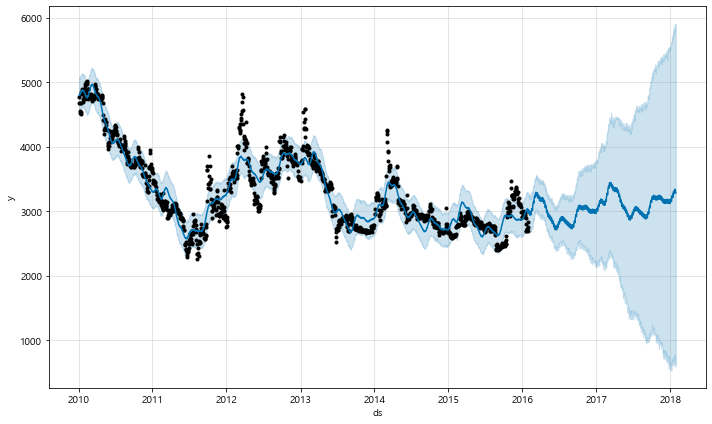

In [170]:
m = Prophet(yearly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods = 730)
forecast = m.predict(future)
m.plot(forecast);

# 예측 데이터 경향 분석

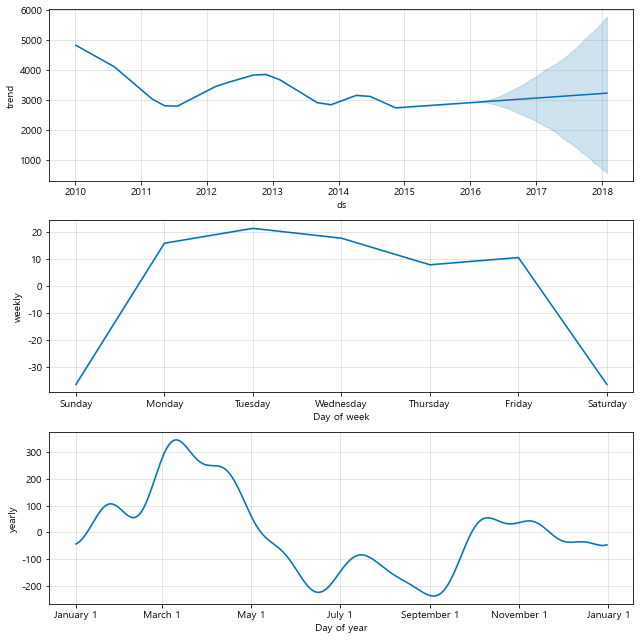

In [171]:
m.plot_components(forecast);

## 실제 주가 데이터와, 예측 주가 데이터 비교해보기

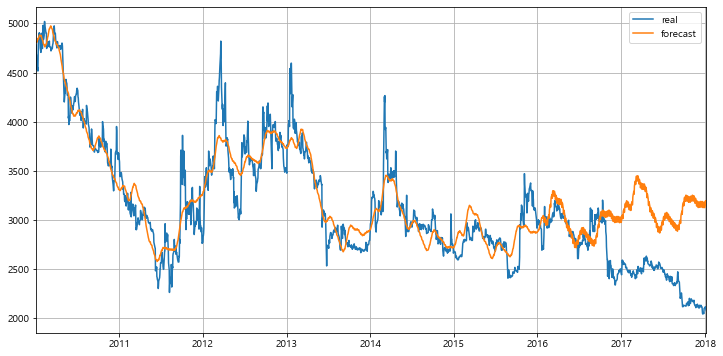

In [172]:
plt.figure(figsize=(12,6))
plt.plot(ytn.index, ytn['Close'],label= 'real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'forecast')
plt.xlim(datetime(2010,1,5),datetime(2018,1,5))
plt.grid()
plt.legend()
plt.show()

# 2. Science_2012 이용해 그래프 그리기

In [139]:
s = pd.read_excel('../data/science_2012.xlsx')

In [140]:
s = pd.DataFrame({'ds' : s['등록일'], 'y' : s['조회수']})
s.set_index('ds', inplace=True)
s.tail()

,y
ds,
2012-12-17,4472
2012-12-19,20005
2012-12-24,8104
2012-12-26,6142
2012-12-31,4446


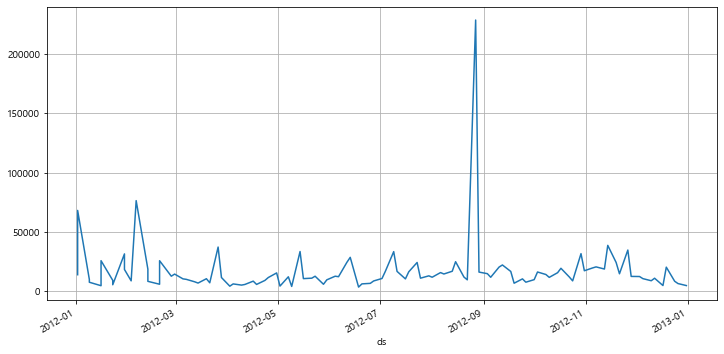

In [141]:
s['y'].plot(figsize = (12,6), grid = True)

In [147]:
s_trunc = s[:'2012-12-31']

s_trunc.reset_index(inplace = True)
s_trunc.tail()

,ds,y
100,2012-12-17,4472
101,2012-12-19,20005
102,2012-12-24,8104
103,2012-12-26,6142
104,2012-12-31,4446


In [153]:
m = Prophet(yearly_seasonality=True)
m.fit(s_trunc)

future = m.make_future_dataframe(periods = 365)
#일년의 기간을 예측해본다. 
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
465,2013-12-27
466,2013-12-28
467,2013-12-29
468,2013-12-30
469,2013-12-31


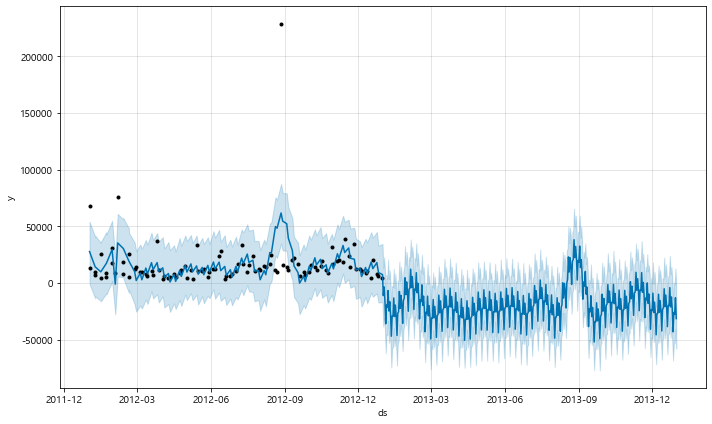

In [154]:
forecast = m.predict(future)
m.plot(forecast);

# 데이터의 datetime별 경향

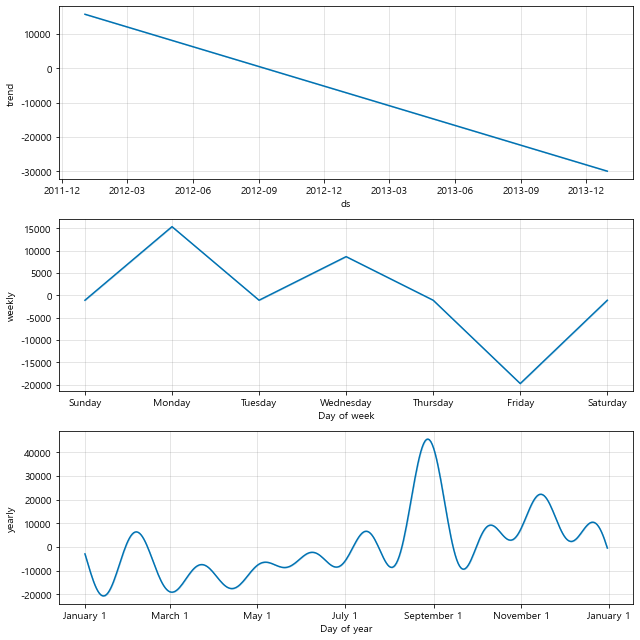

In [155]:
m.plot_components(forecast);

## 실제 데이터와 예측모델 비교해보기

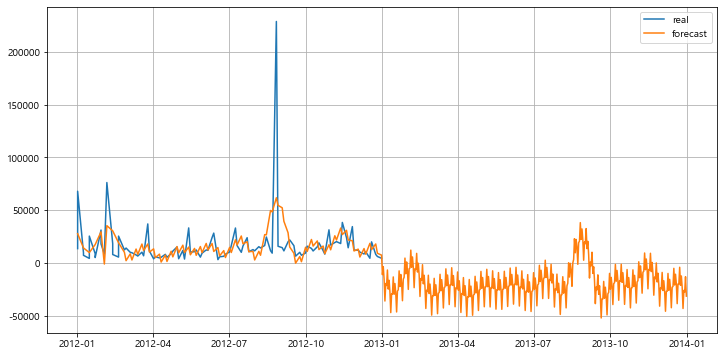

In [156]:
plt.figure(figsize=(12,6))
plt.plot(s.index, s['y'],label= 'real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'forecast')
plt.grid()
plt.legend()
plt.show()

# 예측 결과 굳이 사이트를 유지할 필요는 없어보인다..